# GeekBrains
# Машинное обучение в бизнесе
## ДЗ Урока 1 (Data-driven-подход на примере задачи маршрутизации заявок в helpdesk)
## Виталий Казанцев

Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [4]:
#Ваш код здесь
df[df['gender'] == 'Female']['gender'].shape[0] / df[df['gender'] == 'Male']['gender'].shape[0] 

0.9811533052039381

In [5]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

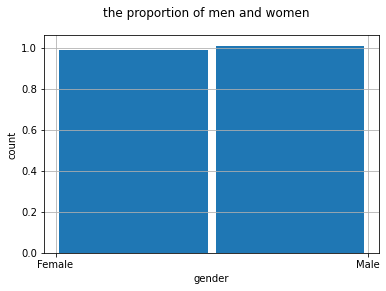

In [7]:
df['gender'].hist(density=True, rwidth=0.95, bins=2)
plt.ylabel('count')
plt.xlabel('gender')

plt.suptitle('the proportion of men and women')
plt.show()

__ОТВЕТ:__  
Соотношение мужчин и женщин примерно 98 к 100, практически один к одному.

##### 2. Какое количество уникальных значений у поля InternetService?

In [8]:
#Ваш код здесь
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [9]:
df['InternetService'].values

array(['DSL', 'DSL', 'DSL', ..., 'DSL', 'Fiber optic', 'Fiber optic'],
      dtype=object)

In [10]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

__ОТВЕТ:__  
Поле **InternetService** имеет три уникальных значения

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [11]:
#Ваш код здесь
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [12]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

У нас нечисловой тип данных, чтобы получить нужные статистические данные нужно привести столбец к числовому типу данных

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float32
dtypes: float32(1)
memory usage: 27.6 KB


In [14]:
total_charges_mean = round(df['TotalCharges'].mean(), 2)
total_charges_median = df['TotalCharges'].median()
total_charges_std = df['TotalCharges'].std()

In [15]:
total_charges_mean, total_charges_median, total_charges_std

(2283.3, 1397.47509765625, 2266.7705078125)

In [16]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.298340
std      2266.770508
min        18.799999
25%       401.450012
50%      1397.475098
75%      3794.737549
max      8684.799805
Name: TotalCharges, dtype: float64

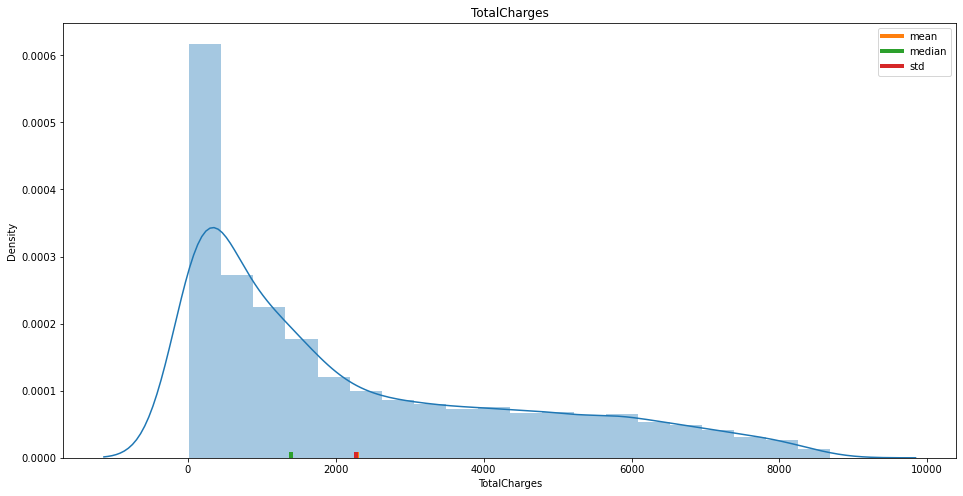

In [17]:
plt.figure(figsize = (16, 8))

sns.distplot(df['TotalCharges'], bins=20)

y = np.linspace(0, 0.000006, 10)
plt.plot([total_charges_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([total_charges_median] * 10, y, label='median',  linewidth=4)
plt.plot([total_charges_std] * 10, y, label='std', linewidth=4)

plt.title('TotalCharges')
plt.legend()
plt.show()

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

Данные приходят в строковом виде

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [18]:
#Ваш код здесь
df['PhoneService'] .tail(10)

7033    Yes
7034    Yes
7035    Yes
7036     No
7037    Yes
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, dtype: object

In [19]:
df.loc[(df['PhoneService'] == 'No', 'PhoneService')] = 0
df.loc[(df['PhoneService'] == 'Yes', 'PhoneService')] = 1
df['PhoneService'] = df['PhoneService'].astype(int)
df['PhoneService'].tail(10)

7033    1
7034    1
7035    1
7036    0
7037    1
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [20]:
#Ваш код здесь
df['TotalCharges'].isna().sum()

11

In [21]:
df.loc[(df['TotalCharges'].isna()), 'TotalCharges'] = 0
df['TotalCharges'].isna().sum()

0

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [22]:
#Ваш код здесь
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [23]:
df.loc[(df['Churn'] == 'No', 'Churn')] = 0
df.loc[(df['Churn'] == 'Yes', 'Churn')] = 1
df['Churn'] = df['Churn'].astype(int)
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [26]:
#Ваш код здесь
def yes_no(df, name):
    df.loc[(df[name] == 'No', name)] = 0
    df.loc[(df[name] == 'Yes', name)] = 1


In [27]:
lst = ['StreamingMovies', 'StreamingTV', 'TechSupport']
for name in lst:
    yes_no(df, name)

In [28]:
df[['StreamingMovies', 'StreamingTV', 'TechSupport']].sample(10)

,StreamingMovies,StreamingTV,TechSupport
5414,1,1,1
992,No internet service,No internet service,No internet service
4707,1,1,0
5965,1,0,0
1193,1,1,1
4710,0,0,1
273,1,1,1
1479,1,1,0
2478,0,0,0
6542,0,0,0


In [29]:
df[['StreamingMovies', 'StreamingTV', 'TechSupport']].value_counts()

StreamingMovies      StreamingTV          TechSupport        
No internet service  No internet service  No internet service    1526
0                    0                    0                      1476
1                    1                    0                       996
                                          1                       944
0                    0                    1                       542
1                    0                    0                       508
0                    1                    0                       493
1                    0                    1                       284
0                    1                    1                       274
dtype: int64

##### 8. Заполните пропуски в поле PhoneService значением 0

In [30]:
#Ваш код здесь
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [33]:
df['PhoneService'].isna().sum()

0

Пропусков нет. Зато есть 'No internet service'  и пропуски в полях 'StreamingMovies', 'StreamingTV', 'TechSupport'. 

In [34]:
def no_internet_service(df, name):
    df.loc[(df[name] == 'No internet service'), name] = 0
    df[name] = df[name].astype(int)
    

In [35]:
lst = ['StreamingMovies', 'StreamingTV', 'TechSupport']
for name in lst:
    no_internet_service(df, name)

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [36]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь

In [37]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,Yes,0,0,0,One year,No,Mailed check,56.95,1889.500000,0
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.150002,1


In [38]:
df = df[columns]

In [39]:
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   tenure           7043 non-null   int64  
 2   PhoneService     7043 non-null   int64  
 3   TotalCharges     7043 non-null   float32
 4   StreamingMovies  7043 non-null   int64  
 5   StreamingTV      7043 non-null   int64  
 6   TechSupport      7043 non-null   int64  
 7   Churn            7043 non-null   int64  
dtypes: float32(1), int64(6), object(1)
memory usage: 412.8+ KB


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [41]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
feature_train, features_test, target_train, target_test = train_test_split(
    df[features], df[target], test_size=0.3, random_state=10
)

In [42]:
feature_train.shape

(4930, 7)

In [43]:
features_test.shape

(2113, 7)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [45]:
#Ваш код здесь
gender.fit_transform(feature_train, target_train)

,gender_Female,gender_Male
1768,1,0
3556,0,1
6018,0,1
2840,1,0
6705,0,1
...,...,...
1180,0,1
3441,1,0
1344,1,0
4623,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [46]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [47]:
#Ваш код здесь
total_charges =Pipeline([
    ('selector', NumberSelector(key='TotalCharges')),
    ('standard', StandardScaler())
])

Объединение всех "кубиков" очень легко сделать таким образом

In [48]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport'])),
                ('standard', StandardScaler())
            ])

In [49]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', total_charges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(feature_train, target_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [53]:
#Ваш код здесь
predict = pipeline.predict(features_test)
predict

array([0, 1, 0, ..., 0, 1, 0])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [54]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
from sklearn. metrics import roc_curve, auc

In [59]:
roc_score = roc_auc_score(target_test, predict)
roc_score

0.6664887872508342

In [58]:
log_loss(target_test, predict)

8.287424679260525

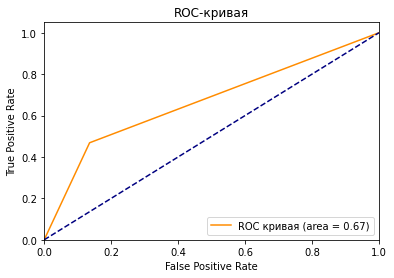

In [60]:
fp, tp, tr = roc_curve(target_test, predict)
roc_auc = auc(fp, tp)
plt.plot(fp, tp, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

### Сохраним наш пайплайн

In [61]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)

ModuleNotFoundError: No module named 'dill'